# Flat Clustering
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import os
import pickle
from pprint import pprint
from os.path import join as JP
from collections import defaultdict

from utils.nlp_utils import preproces
from utils.general import parse_yaml, ensure_directories

from scripts.catalog import (
    Catalog, Document, Corpus,
    load_catalog, load_corpus)

config = parse_yaml('config.yaml')
paths = config['paths']
ensure_directories(paths)

In [3]:
catalog = Catalog()

## Load Catalog

In [4]:
catalog = Catalog()
catalog = load_catalog(path=paths['catalog'], name='spacy_pipeline_on_US_corpus') # 15 documents
catalog = load_catalog(path=paths['catalog'], name='spacy_pipeline_on_EN_corpus') # 43 documents
print(len(catalog.documents))

43


## TFIDF

In [6]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# TODO: Increase all these
EMBED_SIZE = 10000        
NUM_CLUSTERS = 4
WORDS_PER_CLUSTER = 50

In [8]:
vectorizer = TfidfVectorizer(
    min_df=.1,
    max_df=.7,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    max_features=EMBED_SIZE,
    ngram_range=(1,3),
    lowercase=True,
    stop_words=stopwords.words('english'))

In [9]:
_ = catalog.collect_corpus(attr='processed_text', form=list)
tfidf = catalog.to_matrix(
    vectorizer=vectorizer,
    modelname='TFIDF',
    max_docs=None)
print(tfidf.representation.shape)
tfidf.representation.head()

(43, 3862)


,100,a1,able,abovementioned,absence,absence catalyst,absolute,absolute pressure,absorb,absorption,...,yield compound,yield isocyanate,yield low,yield mol,yield product,yield reaction,zeolite,zinc,zirconium,zone
0,0.00,0.00,0.00,0.00,0.11,0.14,0.00,0.00,0.00,0.02,...,0.01,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Clustering

In [10]:
from scripts.algorithms.clustering import kmeans_clustering

from scripts.algorithms.clustering import (
    filter_cluster)

from scripts.algorithms.clustering import (
    compute_word_importance_for_centroid,
    compute_word_importance_using_documents)

from scripts.algorithms.clustering import (
    plot_centroids_as_wordclouds,
    plot_clusters_as_wordclouds,
    plot_subsampled_clusters_as_wordclouds)

In [11]:
clusters, cluster_words = kmeans_clustering(
    model=tfidf,
    num_clusters=NUM_CLUSTERS,
    words_per_cluster=WORDS_PER_CLUSTER)

## Visualization

### Using Centroids

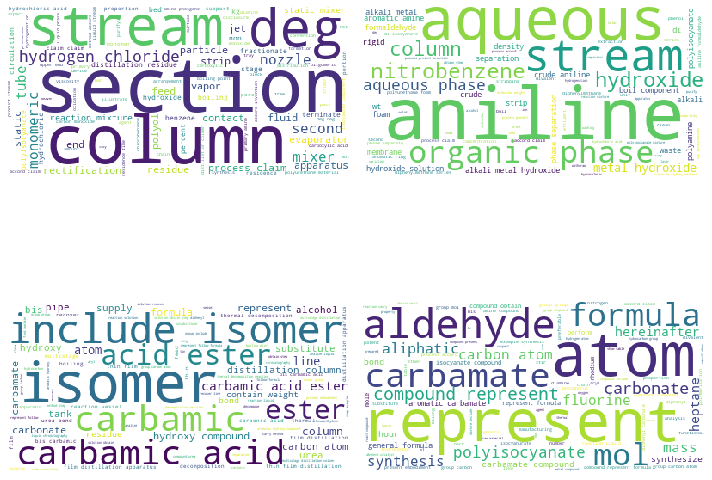

In [12]:
plot_centroids_as_wordclouds(tfidf,clusters)

### Using Subsampled TFIDF

[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster


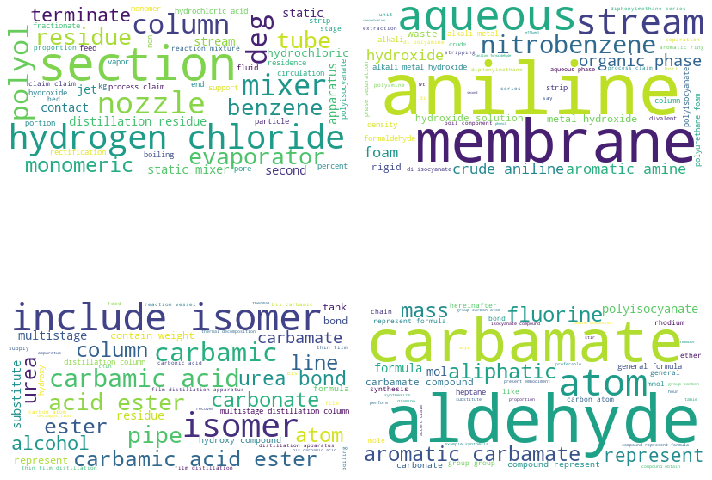

In [13]:
plot_subsampled_clusters_as_wordclouds(tfidf, clusters, cluster_words, method='idf')

### Using All Corpus

[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster


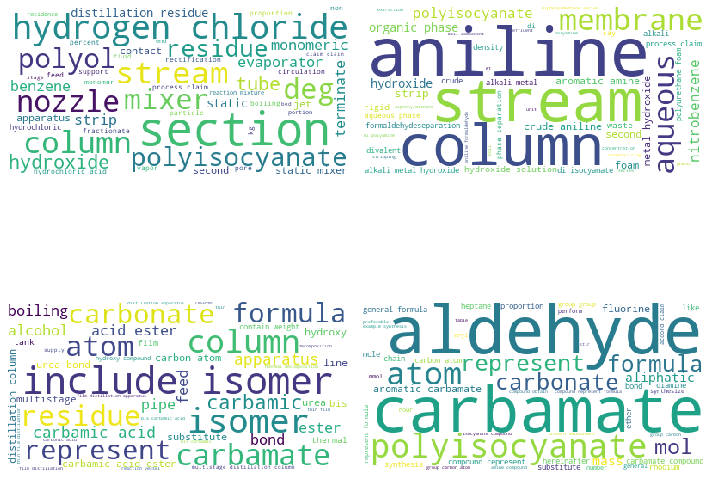

In [14]:
plot_clusters_as_wordclouds(tfidf,cluster_words,method='idf')